<b>Vinicius F. Caridá</b>

<h1 style="text-align:center"> Machine Learning Hands-On </h1>

<h3 class="title"> Links úteis: </h3>
<br>
<ol>
  <li class="item"><a href = "http://scikit-learn.org/stable/"> Sklearn</a>: principal biblioteca de aprendizado de máquina para python.</li>
  <li class="item"><a href = "http://pandas.pydata.org/pandas-docs/stable/"> Pandas</a>: (quase) tudo o que você precisa para trabalhar rapidamente com tabelas</li>
  <li class="item"><a href = "https://docs.scipy.org/doc/numpy/reference/index.html"> Numpy</a>: funções matemáticas estão aqui</li>
  <li class="item"><a href = "https://matplotlib.org/contents.html"> Matplotlib</a>: te ajuda a plotar!</li>
  <li class="item"><a href = "https://seaborn.pydata.org/api.html"> Seaborn</a>: Deixa a matplotlib bonita (contém plots mais bem estruturados)</li>
</ol>

<b>Trabalharemos com as seguintes bases de dados:</b>
- iris.csv
- lenses_final.csv
- car.data
- horse-colic.data
- PETR4.SA.csv
- Boston.csv
- artificial_data

<b>Testem a leitura de um dos arquivos deste curso</b>
- Acessem a documentação da função <i>read_csv</i> do <i>pandas</i>: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html

In [1]:
import numpy as np 
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid', {"axes.grid" : False})
sns.set_context('notebook')
np.random.seed(42)

In [2]:
iris            = pd.read_csv("../arquivos/data/iris.csv")
lenses          = pd.read_csv("../arquivos/data/lenses_final.csv")
car             = pd.read_csv("../arquivos/data/cars.csv")
horsecolic      = pd.read_table("../arquivos/data/horse-colic.data")

<h2 style="text-align:center; margin:40px"> Árvores de Decisão </h2>

<img src="img/titanic.png" style="width:75%"/>

O algoritmo de <b>árvores de decisão</b> busca construir árvores que separam o espaço de variáveis em <b>conjuntos disjuntos e homogêneos</b>.

<h3 style="text-align:center; margin:40px"> Como encontrar as melhores quebras? </h3>

<h3> Entropia: </h3>
A <b>entropia</b> mede a quantidade média de informação produzida por uma variável aleatória. No caso de uma <b>variável binária</b>, a fórmula para o cálculo da entropia é dada por:

$$ H(Y) = - P_0 \log_{2}{P_0} - P_1 \log_{2}{P_1}$$

<p style="text-align:center"> Onde $P_i$ significa $P(Y = i)$ </p>

![](../arquivos/img/entropia.png)

O algoritmo inicia em um nó <b>raiz com todas as observações</b>, e então, recursivamente, divide as observações de cada nó em <b>dois grupos</b>, de forma que a quebra escolhida <b>maximize o ganho de informação</b>:

$$ GI(X_p, X_e, X_d) = H(X_p) - \frac{|X_e|\,H(X_e)+|X_d|\,H(X_d)}{|X_e| + |X_d|} $$

<p style="text-align:center"> Onde: <br/>
$X_p$ é o conjunto de todas as observações no nó pai <br/>
$X_e$ é o conjunto de todas as observações no nó filho esquerdo <br/>
$X_d$ é o conjunto de todas as observações no nó filho direito <br/>
</p>

Para realizar uma predição, basta "descer" pela árvore até chegar em uma folha, e então a nova observação será marcada como sendo da <b>classe mais frequente na folha</b>.

<h3 style="text-align:center; margin:40px"> E se quisermos fazer regressão? </h3>

<b>A ideia é a mesma!</b>. No lugar da entropia utilizaremos a <b>variância</b>, e para fazer predições, basta "descer" pela árvore até chegar em uma folha, e o valor da nova observação será a <b>média dos valores na folha</b>.

<h3> Scikit-Learn </h3>
Agora, vamos rodar os códigos abaixo que usam uma implementação do algoritmo disponível no pacote <i>sklearn</i> (Scikit-Learn). Iremos ver como a escolha dos parâmetros é <b>muito</b> importante para o resultado do algoritmo.

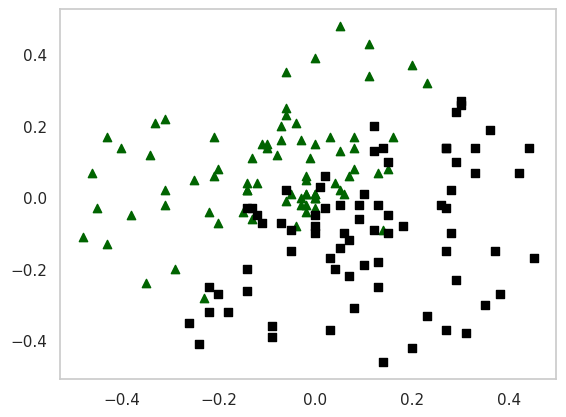

In [4]:
baseDados = pd.read_csv('../arquivos/data/base_regressao_logistica.csv')
plt.scatter(baseDados.X1[baseDados.Y == 0], baseDados.X2[baseDados.Y == 0], c = 'darkgreen', marker = '^')
plt.scatter(baseDados.X1[baseDados.Y == 1], baseDados.X2[baseDados.Y == 1], c = 'black', marker = ',')

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
DT = DecisionTreeClassifier(criterion="entropy", max_depth=2)
X = baseDados.loc[:, baseDados.columns != 'Y']
Y = baseDados.Y
DT.fit(X,Y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

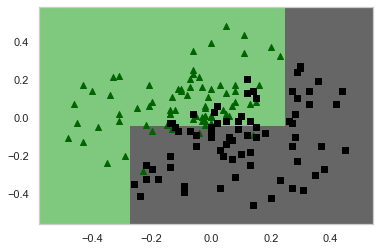

In [13]:
x_min, x_max = baseDados.X1.min() - .1, baseDados.X1.max() + .1
y_min, y_max = baseDados.X2.min() - .1, baseDados.X2.max() + .1
h = .005
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = DT.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap = plt.cm.Accent)

pred = DT.predict(X)
plt.scatter(baseDados.X1[Y == 0], baseDados.X2[Y == 0], c = 'darkgreen', marker = '^')
plt.scatter(baseDados.X1[Y == 1], baseDados.X2[Y == 1], c = 'black', marker = ',')

In [14]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(DT, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

InvocationException: GraphViz's executables not found